Problem 1: Impact of Outliers on Central Tendency Measures
        Original Data  Data with Outliers
Mean        48.961535           49.386091
Median      48.730437           48.730437
Mode              NaN                 NaN


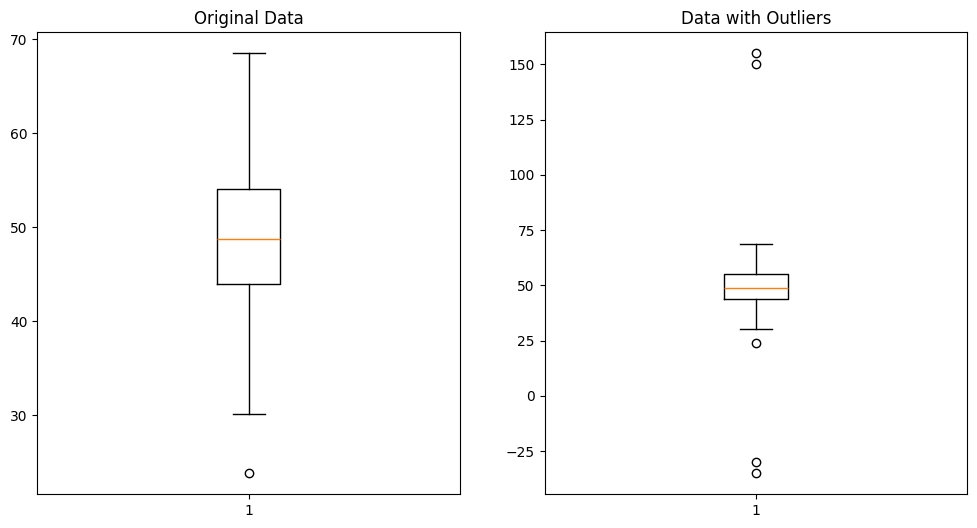

,Original Data,Data with Outliers
Mean,48.961535,49.386091
Median,48.730437,48.730437
Mode,NaN,NaN


In [8]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


## Problem 1: Impact of Outliers
def outlier_analysis():
    # Create dataset without outliers
    np.random.seed(42)
    data = np.random.normal(50, 10, 100)

    # Add outliers
    data_with_outliers = np.append(data, [150, 155, -30, -35])

    # Function to safely calculate mode
    def calculate_mode(dataset):
        try:
            mode_result = stats.mode(dataset)
            # Handle different return types in different scipy versions
            if hasattr(mode_result, 'mode'):
                return mode_result.mode[0] if mode_result.count[0] > 1 else np.nan
            else:
                return mode_result[0][0] if mode_result[1][0] > 1 else np.nan
        except:
            return np.nan

    # Calculate statistics
    stats_dict = {
        'Original Data': {
            'Mean': np.mean(data),
            'Median': np.median(data),
            'Mode': calculate_mode(data)
        },
        'Data with Outliers': {
            'Mean': np.mean(data_with_outliers),
            'Median': np.median(data_with_outliers),
            'Mode': calculate_mode(data_with_outliers)
        }
    }

    # Create comparison table
    df = pd.DataFrame(stats_dict)
    print("Problem 1: Impact of Outliers on Central Tendency Measures")
    print(df)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(data)
    plt.title('Original Data')

    plt.subplot(1, 2, 2)
    plt.boxplot(data_with_outliers)
    plt.title('Data with Outliers')
    plt.show()

    return df

outlier_analysis()


Problem 2: Test Scores Analysis
Mean: 69.25
Median: 70.00
Mode: 75.00


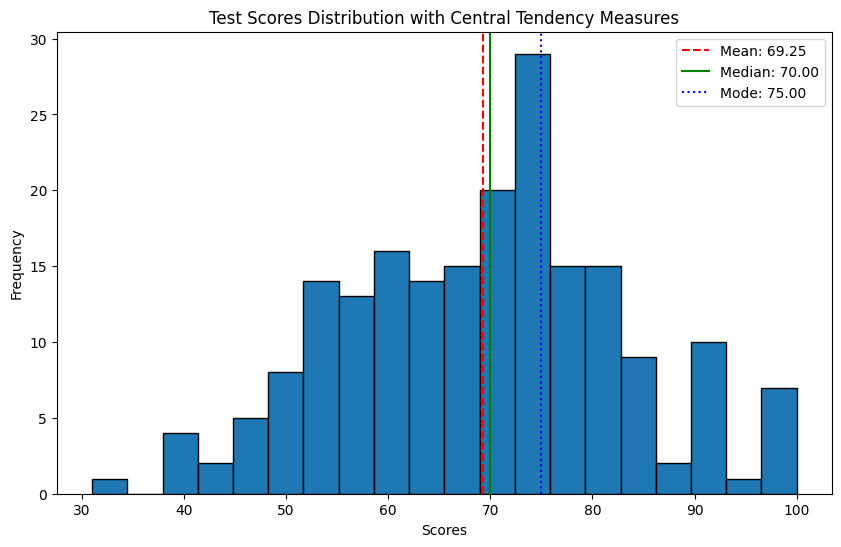

In [10]:
## Problem 2: Measures of Central Tendency
def test_scores_analysis():
    # Create test scores dataset
    np.random.seed(42)
    scores = np.random.normal(70, 15, 200)
    scores = np.clip(scores, 0, 100)  # Ensure scores between 0-100
    scores = np.round(scores)  # Round to make some duplicate values for mode calculation

    # Calculate statistics
    mean = np.mean(scores)
    median = np.median(scores)

    # Calculate mode using pandas (more reliable for this case)
    mode_value = pd.Series(scores).mode()
    if not mode_value.empty:
        mode = mode_value[0]
    else:
        mode = np.nan

    print(f"\nProblem 2: Test Scores Analysis")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.hist(scores, bins=20, edgecolor='black')
    plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    plt.axvline(mode, color='b', linestyle=':', label=f'Mode: {mode:.2f}')
    plt.title('Test Scores Distribution with Central Tendency Measures')
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    return scores, mean, median, mode

scores, mean, median, mode = test_scores_analysis()




Problem 3: Dispersion Measures
Range: 69.00
Interquartile Range (IQR): 18.25
Variance: 186.53
Standard Deviation: 13.66


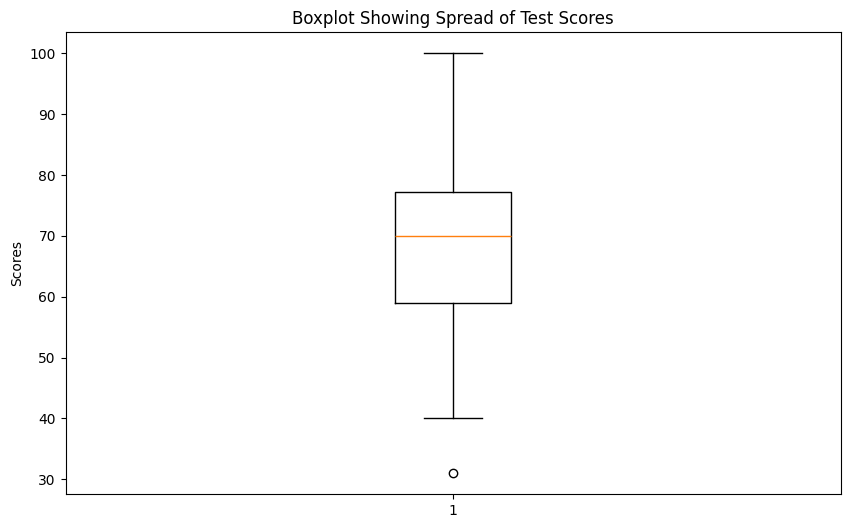

In [11]:
## Problem 3: Measures of Dispersion
def dispersion_analysis():
    # Use the test scores from Problem 2
    data = scores

    # Calculate dispersion measures
    data_range = np.max(data) - np.min(data)
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    variance = np.var(data)
    std_dev = np.std(data)

    print(f"\nProblem 3: Dispersion Measures")
    print(f"Range: {data_range:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    print(f"Variance: {variance:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.boxplot(data)
    plt.title('Boxplot Showing Spread of Test Scores')
    plt.ylabel('Scores')
    plt.show()

    return data_range, iqr, variance, std_dev

data_range, iqr, variance, std_dev = dispersion_analysis()




Problem 4: Paired t-test Results
t-statistic: -9.0915
p-value: 0.0000
Result is statistically significant (p < 0.05)
Conclusion: The study program had a significant effect.


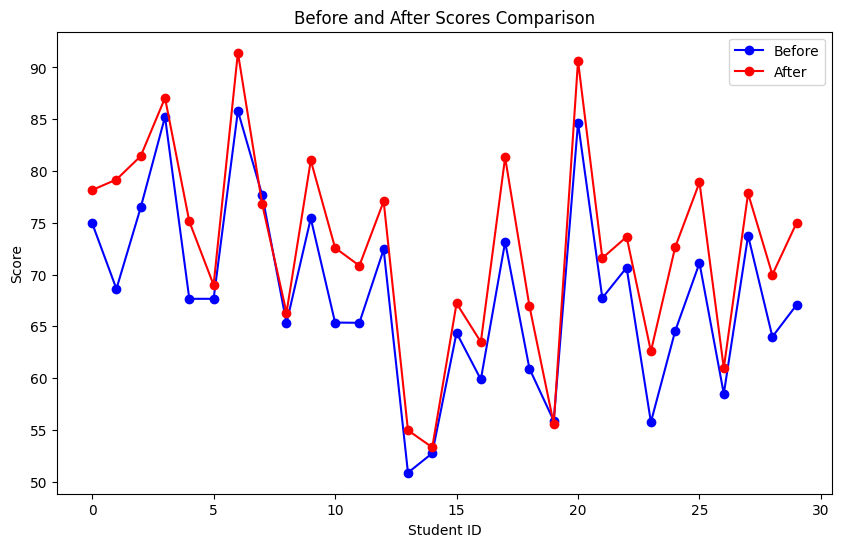

In [12]:
## Problem 4: Paired t-test
def paired_ttest():
    # Create before and after scores
    np.random.seed(42)
    before = np.random.normal(70, 10, 30)
    after = before + np.random.normal(5, 3, 30)  # Simulate improvement

    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(before, after)

    print(f"\nProblem 4: Paired t-test Results")
    print(f"t-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Result is statistically significant (p < 0.05)")
        print("Conclusion: The study program had a significant effect.")
    else:
        print("Result is not statistically significant (p ≥ 0.05)")
        print("Conclusion: No evidence the study program had an effect.")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(before)), before, 'bo-', label='Before')
    plt.plot(range(len(after)), after, 'ro-', label='After')
    plt.title('Before and After Scores Comparison')
    plt.xlabel('Student ID')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

    return t_stat, p_value

t_stat, p_value = paired_ttest()



In [13]:
## Problem 5: Type I and Type II Errors
def error_simulation():
    # Type I Error (False Positive)
    np.random.seed(42)
    control = np.random.normal(100, 15, 50)
    treatment = np.random.normal(100, 15, 50)  # Same distribution

    # Perform t-test (should not reject null)
    _, p_value_type1 = stats.ttest_ind(control, treatment)
    type1_error = p_value_type1 < 0.05

    # Type II Error (False Negative)
    control = np.random.normal(100, 15, 20)  # Small sample size
    treatment = np.random.normal(110, 15, 20)  # Different means

    # Perform t-test (might not detect difference)
    _, p_value_type2 = stats.ttest_ind(control, treatment)
    type2_error = p_value_type2 >= 0.05

    print("\nProblem 5: Error Simulation Results")
    print(f"Type I Error occurred: {type1_error} (p-value: {p_value_type1:.4f})")
    print(f"Type II Error occurred: {type2_error} (p-value: {p_value_type2:.4f})")

    return type1_error, type2_error

type1_error, type2_error = error_simulation()




Problem 5: Error Simulation Results
Type I Error occurred: False (p-value: 0.1818)
Type II Error occurred: True (p-value: 0.1321)



Problem 6: Linear Regression Results
Intercept: 30966.89
Coefficient: 4776.57
Predicted salary for 5 years experience: $54,849.72


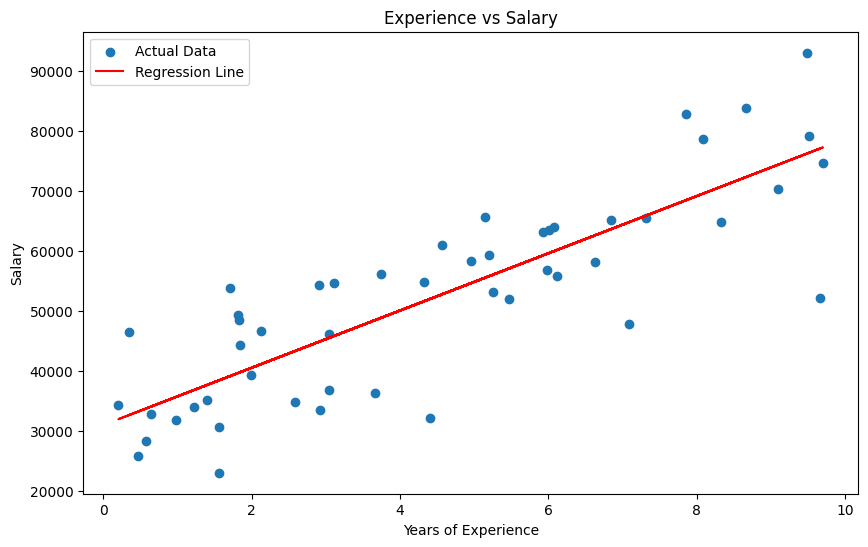

In [14]:
## Problem 6: Simple Linear Regression
def linear_regression():
    # Create experience vs salary dataset
    np.random.seed(42)
    experience = np.random.uniform(0, 10, 50)
    salary = 30000 + 5000 * experience + np.random.normal(0, 10000, 50)

    # Reshape for sklearn
    X = experience.reshape(-1, 1)
    y = salary

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Predict for 5 years experience
    prediction = model.predict([[5]])[0]

    print(f"\nProblem 6: Linear Regression Results")
    print(f"Intercept: {model.intercept_:.2f}")
    print(f"Coefficient: {model.coef_[0]:.2f}")
    print(f"Predicted salary for 5 years experience: ${prediction:,.2f}")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.title('Experience vs Salary')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

    return model, prediction

model, prediction = linear_regression()




Problem 7: Underfitting and Overfitting Results
Linear Model (Underfitting):
  Training MSE: 3.0993
  Test MSE: 2.2551

High-degree Polynomial Model (Overfitting):
  Training MSE: 0.7213
  Test MSE: 0.8841


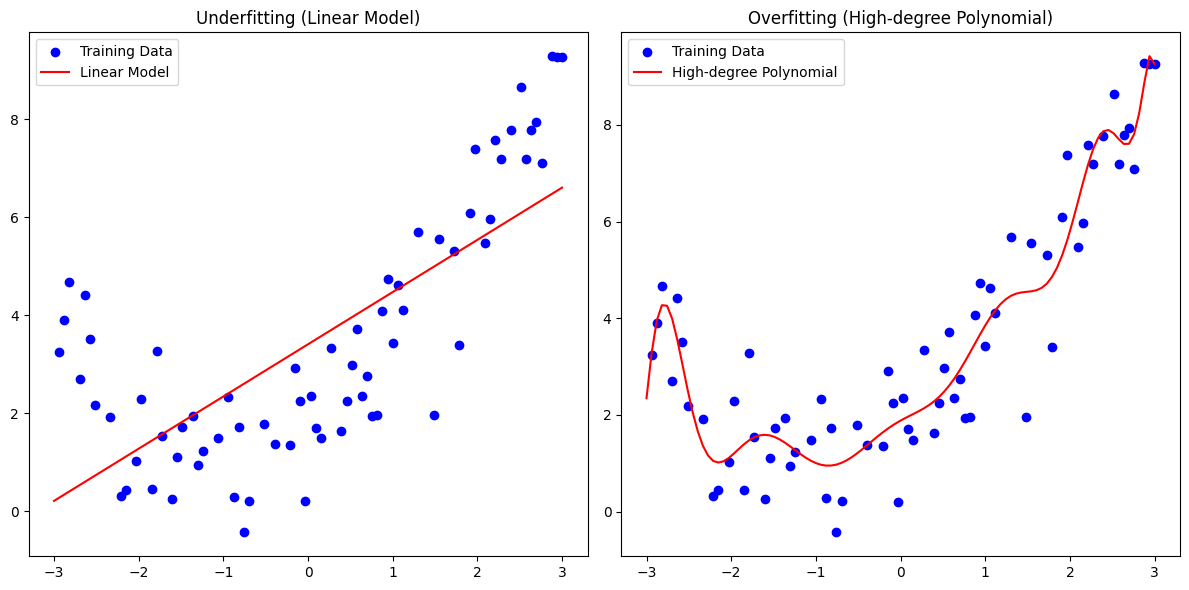

In [15]:
## Problem 7: Underfitting and Overfitting
def polynomial_regression():
    # Generate quadratic data with noise
    np.random.seed(42)
    X = np.linspace(-3, 3, 100)
    y = 0.5 * X**2 + X + 2 + np.random.normal(0, 1, 100)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Underfitting (linear model)
    model_linear = make_pipeline(PolynomialFeatures(1), LinearRegression())
    model_linear.fit(X_train.reshape(-1, 1), y_train)

    # Overfitting (high degree polynomial)
    model_overfit = make_pipeline(PolynomialFeatures(15), LinearRegression())
    model_overfit.fit(X_train.reshape(-1, 1), y_train)

    # Calculate MSE
    mse_linear_train = mean_squared_error(y_train, model_linear.predict(X_train.reshape(-1, 1)))
    mse_linear_test = mean_squared_error(y_test, model_linear.predict(X_test.reshape(-1, 1)))

    mse_overfit_train = mean_squared_error(y_train, model_overfit.predict(X_train.reshape(-1, 1)))
    mse_overfit_test = mean_squared_error(y_test, model_overfit.predict(X_test.reshape(-1, 1)))

    print("\nProblem 7: Underfitting and Overfitting Results")
    print("Linear Model (Underfitting):")
    print(f"  Training MSE: {mse_linear_train:.4f}")
    print(f"  Test MSE: {mse_linear_test:.4f}")

    print("\nHigh-degree Polynomial Model (Overfitting):")
    print(f"  Training MSE: {mse_overfit_train:.4f}")
    print(f"  Test MSE: {mse_overfit_test:.4f}")

    # Visualization
    plt.figure(figsize=(12, 6))

    # Sort for plotting
    X_plot = np.linspace(-3, 3, 100)

    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(X_plot, model_linear.predict(X_plot.reshape(-1, 1)), color='red', label='Linear Model')
    plt.title('Underfitting (Linear Model)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.plot(X_plot, model_overfit.predict(X_plot.reshape(-1, 1)), color='red', label='High-degree Polynomial')
    plt.title('Overfitting (High-degree Polynomial)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model_linear, model_overfit, mse_linear_test, mse_overfit_test

model_linear, model_overfit, mse_linear, mse_overfit = polynomial_regression()



Problem 8: Regression Model Comparison
Linear Regression MSE: 86690591.82
Polynomial Regression MSE: 85205784.26
Lasso Regression MSE: 86690700.93


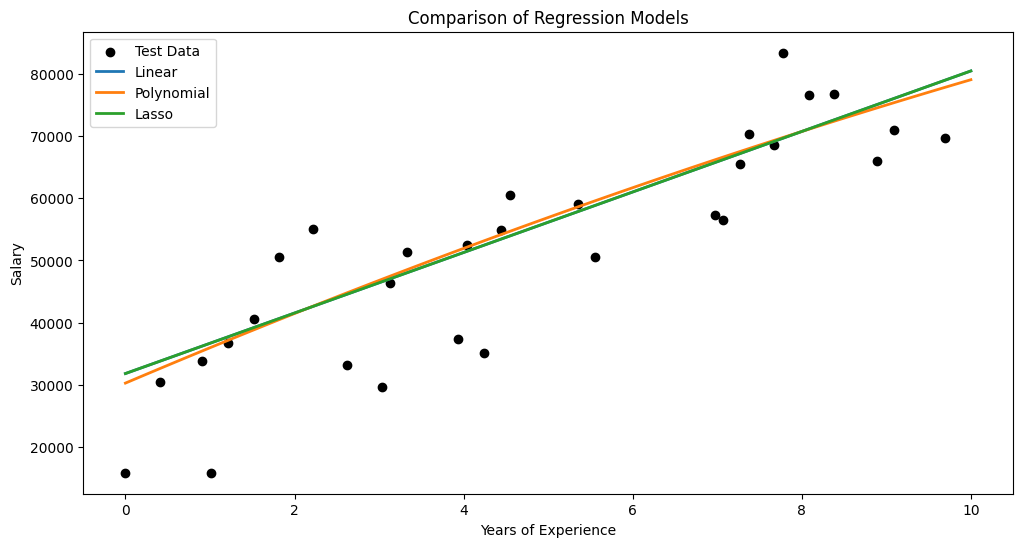

In [16]:
## Problem 8: Comparing Regression Models
def compare_regression_models():
    # Use the experience vs salary data from Problem 6
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    y = 30000 + 5000 * X.ravel() + np.random.normal(0, 10000, 100)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Linear Regression
    linear = LinearRegression()
    linear.fit(X_train, y_train)

    # Polynomial Regression (degree=2)
    poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
    poly.fit(X_train, y_train)

    # Lasso Regression
    lasso = Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)

    # Calculate MSE
    mse_linear = mean_squared_error(y_test, linear.predict(X_test))
    mse_poly = mean_squared_error(y_test, poly.predict(X_test))
    mse_lasso = mean_squared_error(y_test, lasso.predict(X_test))

    print("\nProblem 8: Regression Model Comparison")
    print(f"Linear Regression MSE: {mse_linear:.2f}")
    print(f"Polynomial Regression MSE: {mse_poly:.2f}")
    print(f"Lasso Regression MSE: {mse_lasso:.2f}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='black', label='Test Data')

    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    plt.plot(X_plot, linear.predict(X_plot), label='Linear', linewidth=2)
    plt.plot(X_plot, poly.predict(X_plot), label='Polynomial', linewidth=2)
    plt.plot(X_plot, lasso.predict(X_plot), label='Lasso', linewidth=2)

    plt.title('Comparison of Regression Models')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

    return mse_linear, mse_poly, mse_lasso

mse_linear, mse_poly, mse_lasso = compare_regression_models()



Problem 9: Correlation and Regression
Pearson correlation coefficient: 0.9687
Regression equation: Marks = 30.61 + 6.88 * Hours


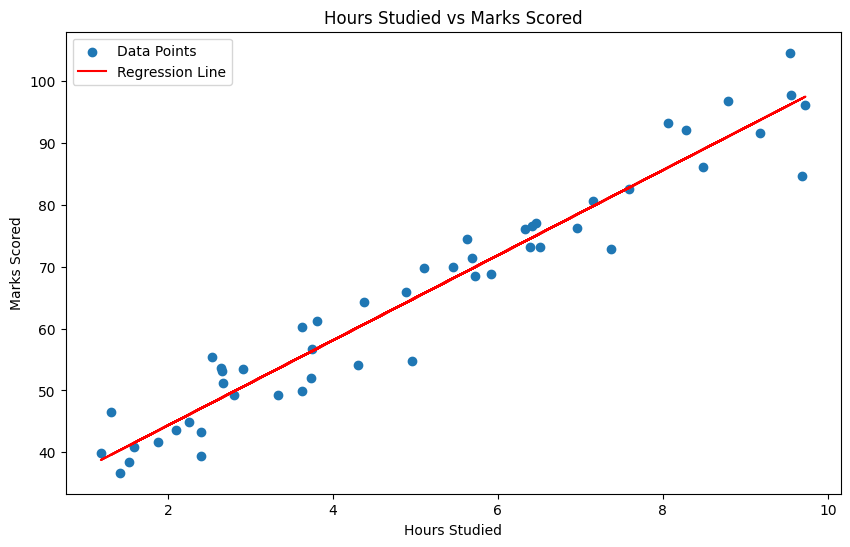

In [17]:
## Problem 9: Correlation and Regression
def correlation_regression():
    # Create hours studied vs marks scored dataset
    np.random.seed(42)
    hours = np.random.uniform(1, 10, 50)
    marks = 30 + 7 * hours + np.random.normal(0, 5, 50)

    # Calculate Pearson correlation
    corr = np.corrcoef(hours, marks)[0, 1]

    # Fit linear regression
    X = hours.reshape(-1, 1)
    y = marks
    model = LinearRegression()
    model.fit(X, y)

    print("\nProblem 9: Correlation and Regression")
    print(f"Pearson correlation coefficient: {corr:.4f}")
    print(f"Regression equation: Marks = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Hours")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(hours, marks, label='Data Points')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.title('Hours Studied vs Marks Scored')
    plt.xlabel('Hours Studied')
    plt.ylabel('Marks Scored')
    plt.legend()
    plt.show()

    return corr, model

corr, model = correlation_regression()

# **Explanation of Each Problem:**  
**Problem 1: Impact of Outliers**  
Demonstrates how outliers affect mean, median, and mode

Shows that mean is most affected by outliers while median is more robust

Includes boxplot visualization to identify outliers

**Problem 2: Measures of Central Tendency**  
Creates a test score dataset with normal distribution

Calculates and visualizes mean, median, and mode on a histogram

Shows how these measures describe the center of the data distribution

**Problem 3: Measures of Dispersion**  
Uses the test score dataset to calculate range, IQR, variance, and standard deviation

Visualizes data spread using a boxplot

Demonstrates how these measures quantify data variability

**Problem 4: Paired t-test**  
Simulates before-and-after test scores to evaluate a study program

Performs a paired t-test to determine if improvements are statistically significant

Interprets the p-value to make conclusions about program effectiveness

**Problem 5: Type I and Type II Errors**  
Simulates scenarios that lead to Type I (false positive) and Type II (false negative) errors

Shows how sample size and effect size influence these errors

Demonstrates the trade-off between the two error types

**Problem 6: Simple Linear Regression**  
Models the relationship between years of experience and salary

Predicts salary for 5 years of experience

Visualizes the regression line over the scatterplot of data points

**Problem 7: Underfitting and Overfitting**
Generates quadratic data and fits both linear and high-degree polynomial models

Demonstrates underfitting (high bias) and overfitting (high variance)

Compares training and test MSE to show model generalization performance

**Problem 8: Comparing Regression Models**  
Compares linear, polynomial, and Lasso regression on the same dataset

Evaluates models using mean squared error

Visualizes how different models fit the data

**Problem 9: Correlation and Regression**  
Calculates Pearson correlation coefficient between hours studied and marks scored

Fits a linear regression model and visualizes the relationship

Shows how correlation and regression complement each other in analysis